# 3. Train_NN

**Tensorboard**
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

In [1]:
import time
import os
import pandas as pd

project_name = 'SceneClassification'
step_name = 'Train_NN'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

cwd = os.getcwd()
model_path = os.path.join(cwd, 'model')
feature_pca_file = os.path.join(model_path, 'feature_pca_SceneClassification_Dim_reduction_20171202_235958.h5')
print('model_path: ' + model_path)
print('feature_pca_file: ' + feature_pca_file)

run_name: SceneClassification_Train_NN_20171203_105335
model_path: E:\AIChallenger\SceneClassification2017\model
feature_pca_file: E:\AIChallenger\SceneClassification2017\model\feature_pca_SceneClassification_Dim_reduction_20171202_235958.h5


In [2]:
test_images = os.listdir(os.path.join(cwd, 'input', 'data_test_a', 'test'))
print(test_images[0:10])

['00002ff812f48a3df27c321d517a6300ed8da0c3.jpg', '00049a860dca2af378faeb0ee6f435c6063818ef.jpg', '0011a9c9216c3763ffc33641a8ffc975127dc404.jpg', '0045a44cacc7bc9826db9b54d2dcd70b810250f9.jpg', '004b6823145471c6a4ce292e864909fde2d04969.jpg', '0056e4d54eee781117c9d407d03ebf7192126b1f.jpg', '005763f88b25b18ae524b25afcce960403665383.jpg', '005b5444df96e3a155f2a73a8dccc0267e118413.jpg', '005c6ba205a246d0d3c8f73adfd4398b8e483962.jpg', '005de85662d754f98a1476a37b189902800ace91.jpg']


In [3]:
import h5py
import numpy as np

with h5py.File(feature_pca_file, 'r') as h:
    x_train = np.array(h['train'])
    y_train = np.array(h['train_label'])
    x_val = np.array(h['val'])
    y_val = np.array(h['val_label'])
    x_test = np.array(h['test_b'])

print(x_train.shape)
print(len(y_train))
print(x_val.shape)
print(len(y_val))
print(x_test.shape)

(53879, 512)
53879
(7120, 512)
7120
(7078, 512)


In [4]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape)
print(y_train.shape)

(53879, 512)
(53879,)


In [5]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train.shape)
print(y_val.shape)

Using TensorFlow backend.


(53879, 80)
(7120, 80)


In [6]:
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1024, input_shape=x_train.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='softmax'))

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
from keras.callbacks import TensorBoard

log_path = os.path.join(model_path, run_name)
print('log_dir:' + log_path)

from keras.callbacks import TensorBoard, LearningRateScheduler
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x) # Do not why, when add annealer, the net will be divergency
tensorBoard = TensorBoard(log_dir=log_path)

log_dir:E:\AIChallenger\SceneClassification2017\model\SceneClassification_Train_NN_20171203_105335


In [8]:
hist = model.fit(x_train, y_train,
                 batch_size=1024,
                 epochs=200, #Increase this when not on Kaggle kernel
                 verbose=1,  #1 for ETA, 0 for silent
                 validation_data=(x_val, y_val), 
                 callbacks=[tensorBoard])

Train on 53879 samples, validate on 7120 samples
Epoch 1/200
53879/53879 [==============================] - 1s 22us/step - loss: 4.5974 - acc: 0.0206 - val_loss: 4.2593 - val_acc: 0.2145
Epoch 2/200
53879/53879 [==============================] - 1s 15us/step - loss: 4.2482 - acc: 0.0476 - val_loss: 3.9753 - val_acc: 0.3087
Epoch 3/200
53879/53879 [==============================] - 1s 15us/step - loss: 3.9336 - acc: 0.1076 - val_loss: 3.2843 - val_acc: 0.3968
Epoch 4/200
53879/53879 [==============================] - 1s 15us/step - loss: 3.4693 - acc: 0.1906 - val_loss: 2.6054 - val_acc: 0.4791
Epoch 5/200
53879/53879 [==============================] - 1s 15us/step - loss: 3.0346 - acc: 0.2713 - val_loss: 2.1107 - val_acc: 0.5413
Epoch 6/200
53879/53879 [==============================] - 1s 15us/step - loss: 2.6935 - acc: 0.3345 - val_loss: 1.7969 - val_acc: 0.5848
Epoch 7/200
53879/53879 [==============================] - 1s 15us/step - loss: 2.4433 - acc: 0.3873 - val_loss: 1.6064 - v

53879/53879 [==============================] - 1s 15us/step - loss: 1.1170 - acc: 0.6939 - val_loss: 0.8285 - val_acc: 0.7653
Epoch 60/200
53879/53879 [==============================] - 1s 15us/step - loss: 1.1134 - acc: 0.6952 - val_loss: 0.8262 - val_acc: 0.7643
Epoch 61/200
53879/53879 [==============================] - 1s 15us/step - loss: 1.1107 - acc: 0.6951 - val_loss: 0.8246 - val_acc: 0.7650
Epoch 62/200
53879/53879 [==============================] - 1s 15us/step - loss: 1.1030 - acc: 0.6983 - val_loss: 0.8246 - val_acc: 0.7649
Epoch 63/200
53879/53879 [==============================] - 1s 15us/step - loss: 1.0886 - acc: 0.7003 - val_loss: 0.8216 - val_acc: 0.7647
Epoch 64/200
53879/53879 [==============================] - 1s 15us/step - loss: 1.0892 - acc: 0.7010 - val_loss: 0.8212 - val_acc: 0.7676
Epoch 65/200
53879/53879 [==============================] - 1s 15us/step - loss: 1.0841 - acc: 0.7008 - val_loss: 0.8185 - val_acc: 0.7656
Epoch 66/200
53879/53879 [==============

Epoch 118/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.8848 - acc: 0.7491 - val_loss: 0.7870 - val_acc: 0.7754
Epoch 119/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.8786 - acc: 0.7507 - val_loss: 0.7883 - val_acc: 0.7746
Epoch 120/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.8790 - acc: 0.7501 - val_loss: 0.7864 - val_acc: 0.7740
Epoch 121/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.8740 - acc: 0.7527 - val_loss: 0.7875 - val_acc: 0.7746
Epoch 122/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.8702 - acc: 0.7532 - val_loss: 0.7871 - val_acc: 0.7744
Epoch 123/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.8705 - acc: 0.7537 - val_loss: 0.7876 - val_acc: 0.7758
Epoch 124/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.8612 - acc: 0.7533 - val_loss: 0.7883 - val_acc: 0.7770
Epoch 125/200
53879/

53879/53879 [==============================] - 1s 15us/step - loss: 0.7426 - acc: 0.7813 - val_loss: 0.7992 - val_acc: 0.7788
Epoch 177/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.7389 - acc: 0.7847 - val_loss: 0.7979 - val_acc: 0.7803
Epoch 178/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.7421 - acc: 0.7815 - val_loss: 0.7990 - val_acc: 0.7788
Epoch 179/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.7386 - acc: 0.7843 - val_loss: 0.8009 - val_acc: 0.7791
Epoch 180/200
53879/53879 [==============================] - 1s 14us/step - loss: 0.7350 - acc: 0.7846 - val_loss: 0.7994 - val_acc: 0.7789
Epoch 181/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.7290 - acc: 0.7869 - val_loss: 0.8002 - val_acc: 0.7781
Epoch 182/200
53879/53879 [==============================] - 1s 15us/step - loss: 0.7288 - acc: 0.7854 - val_loss: 0.8018 - val_acc: 0.7777
Epoch 183/200
53879/53879 [=======

In [9]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.8033, final accuracy: 0.7779


In [10]:
val_preds = model.predict(x_val)
print(val_preds.shape)
print(y_val.shape)

(7120, 80)
(7120, 80)


In [11]:
from sklearn.metrics import log_loss, accuracy_score

print('Val log_loss: {}'.format(log_loss(y_val, val_preds)))
val_proba_limited = np.clip(val_preds, 0.005, 0.995)
print('Val limited log_loss: {}'.format(log_loss(y_val, val_proba_limited)))

Val log_loss: 0.8040738686090223
Val limited log_loss: 1.0569464006785596


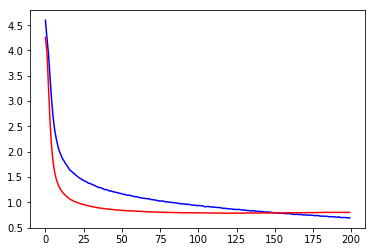

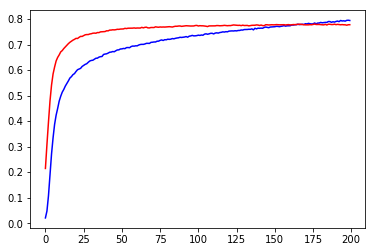

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

## Output

In [13]:
run_name0 = run_name + '_' + str(int(final_acc*10000))
print('run_name: ' + run_name0)

run_name: SceneClassification_Train_NN_20171203_105335_7779


In [14]:
def saveModel(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
saveModel(model, run_name0)

In [15]:
print(run_name0)
print('Done !')

SceneClassification_Train_NN_20171203_105335_7779
Done !
